In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

In [ ]:
iris_data=pd.read_csv("/content/IRIS.csv")
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Calculates statistical values and rounds them to 3 decimal places.

In [ ]:

iris_data.describe().round(3)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


calculate null vaues in each column

In [ ]:

iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data inspection

In [ ]:

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:

iris_data.shape

(150, 5)

In [ ]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**One hot Encoding**

In [ ]:

iris_data['species']=iris_data['species'].apply({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}.get)

**Data Visualization**

<Axes: >

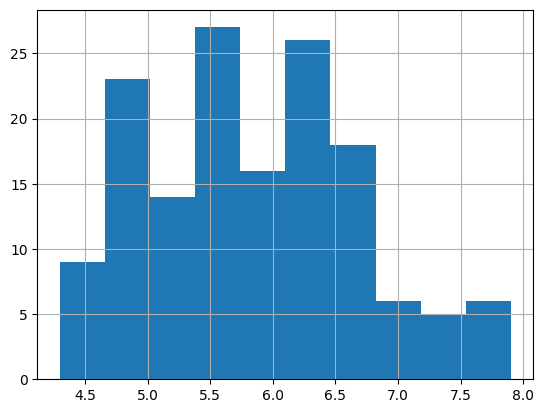

In [ ]:
iris_data['sepal_length'].hist()

<Axes: >

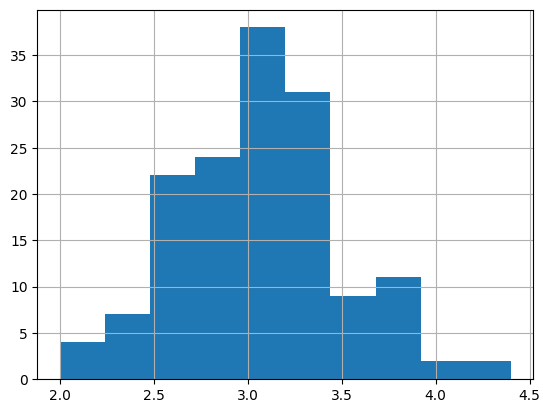

In [ ]:
iris_data['sepal_width'].hist()

<Axes: >

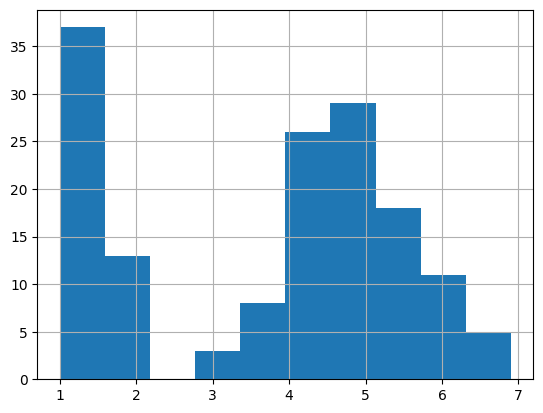

In [ ]:
iris_data['petal_length'].hist()

<Axes: >

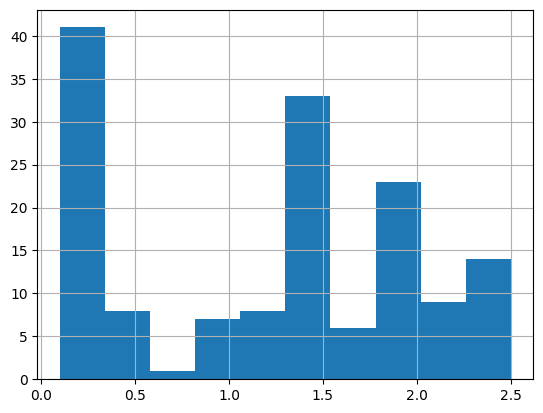

In [ ]:
iris_data['petal_width'].hist()

Seeing outliers using Boxplot

<ipython-input-51-39f73b1f162b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=iris_data, palette='Set3')
<ipython-input-51-39f73b1f162b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=iris_data, palette='Set3')
<ipython-input-51-39f73b1f162b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=iris_data, palette='Set3')
<ipython-input-51-39f73b1f162b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

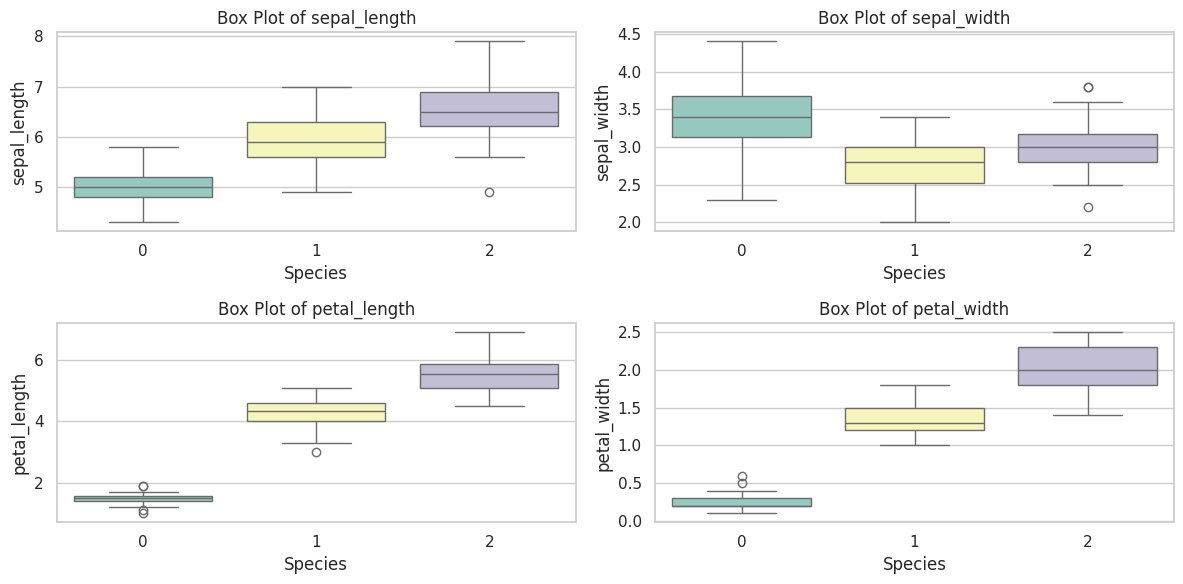

In [ ]:
# Box plots
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, column in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=iris_data, palette='Set3')

    plt.title(f'Box Plot of {column}')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

**Removing outliers**

In [ ]:
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species_with_outliers = {'Iris-setosa': ['petal_length', 'petal_width'],
                         'Iris-versicolor': ['petal_length'],
                         'Iris-virginica': ['sepal_length', 'sepal_width']}

# Winsorize values for 'Iris-setosa' and 'petal_length'
iris_data.loc[(iris_data['species'] == 'Iris-setosa') & (iris_data['petal_length'] < 1.3), 'petal_length'] = 1.3
iris_data.loc[(iris_data['species'] == 'Iris-setosa') & (iris_data['petal_length'] > 1.7), 'petal_length'] = 1.7

# Find and replace outliers with median for specific species and attributes
for species, outlier_columns in species_with_outliers.items():
    for column in outlier_columns:
        q_low = iris_data[iris_data['species'] == species][column].quantile(0.05)
        q_high = iris_data[iris_data['species'] == species][column].quantile(0.95)

        # Replace outliers with median
        median_value = iris_data[iris_data['species'] == species][column].median()
        iris_data.loc[(iris_data['species'] == species) & ((iris_data[column] < q_low) | (iris_data[column] > q_high)), column] = median_value


Boxplot after removing outliers

<ipython-input-54-884e9930a420>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=iris_data, palette='Set3')
<ipython-input-54-884e9930a420>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=iris_data, palette='Set3')
<ipython-input-54-884e9930a420>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=column, data=iris_data, palette='Set3')
<ipython-input-54-884e9930a420>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

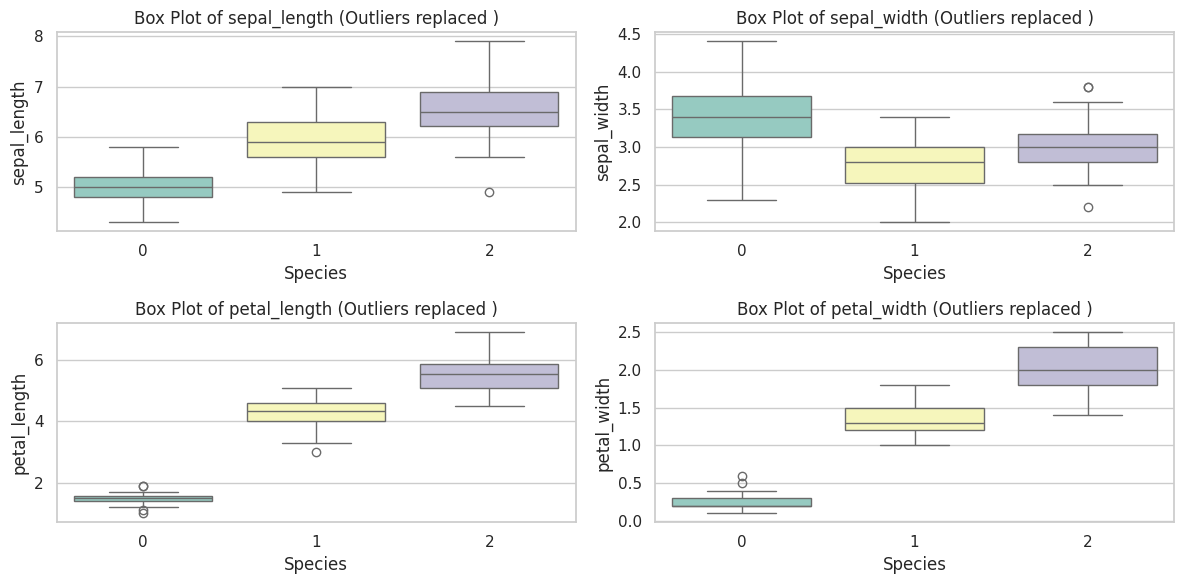

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for i, column in enumerate(attributes):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=iris_data, palette='Set3')

    plt.title(f'Box Plot of {column} (Outliers replaced )')
    plt.xlabel('Species')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x=iris_data.drop(['species'],axis=1)
y=iris_data['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

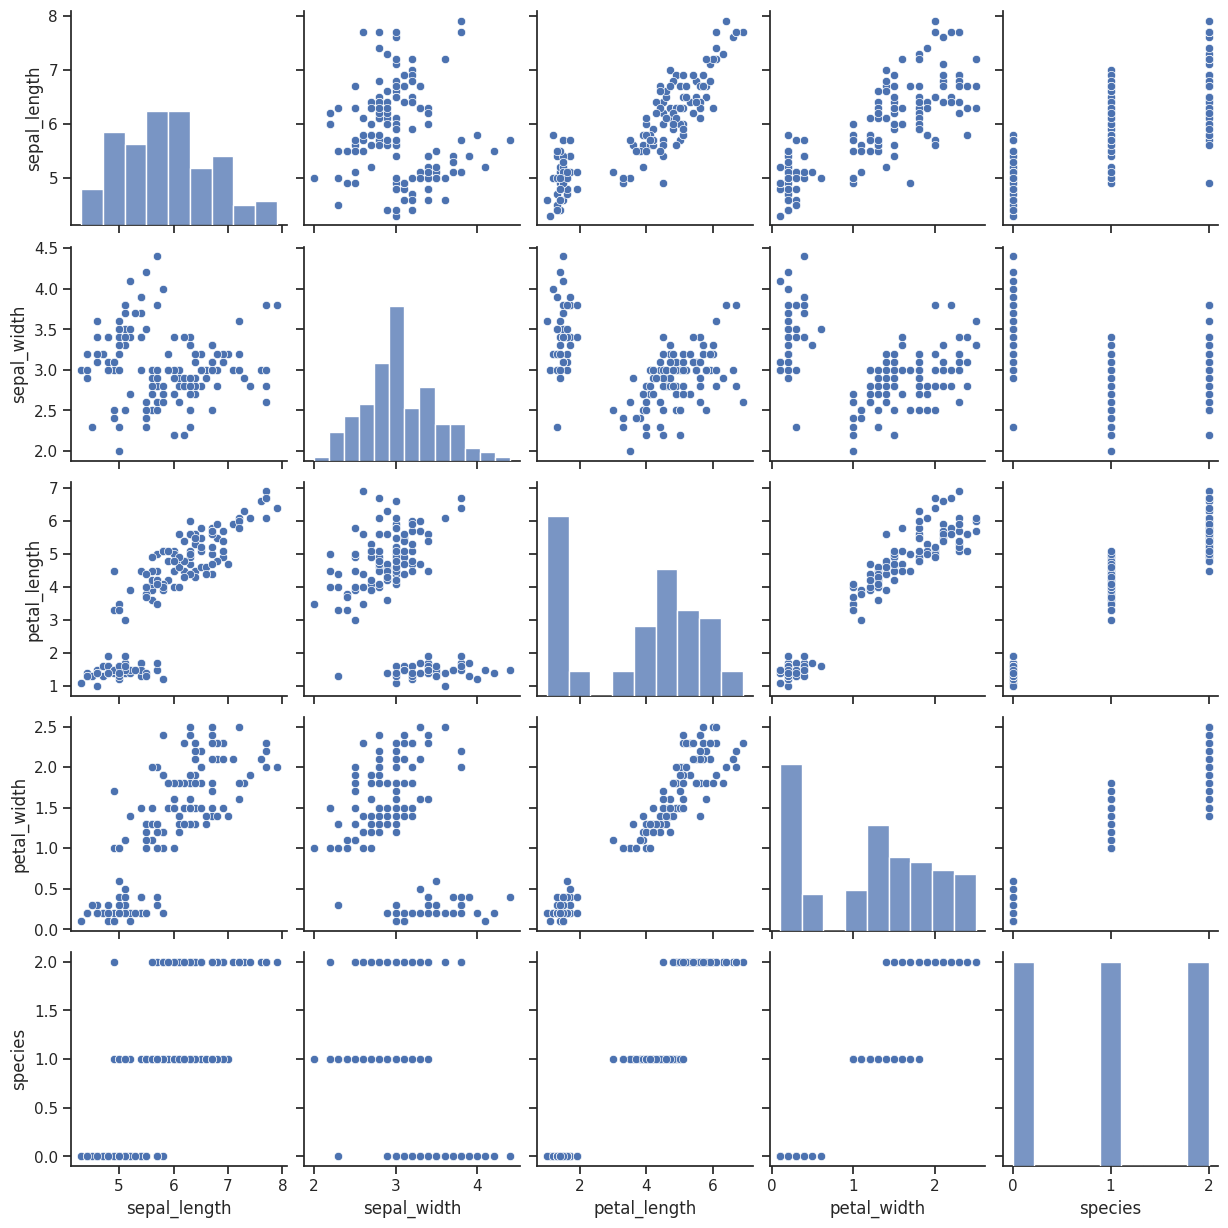

In [ ]:
sns.set(style="ticks")
sns.pairplot(iris_data,markers=["o", "s", "D"])
plt.show()

Model1:**Logistic Regression**

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
predictions=model.predict(x_test)
print(predictions)

[1 0 1 1 2 2 1 2 1 0 2 1 1 2 1 2 2 0 1 0 0 1 1 0 2 2 0 2 2 2]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [ ]:
print(cm)

[[ 7  0  0]
 [ 0 11  2]
 [ 0  0 10]]


In [ ]:
print(ac)

0.9333333333333333


Model2:**Support Vector Machine**

In [ ]:

from sklearn.svm import SVC
model2=SVC()

In [ ]:
model2.fit(x_train,y_train)

SVC()

In [ ]:
predictions=model2.predict(x_test)
print(predictions)

[1 0 1 1 2 2 1 2 1 0 2 1 1 2 1 2 1 0 1 0 0 1 1 0 2 2 0 2 2 2]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusionmatrix=confusion_matrix(y_test,predictions)
acuracy=accuracy_score(y_test,predictions)

In [ ]:
print(confusionmatrix)

[[ 7  0  0]
 [ 0 12  1]
 [ 0  0 10]]


In [ ]:
print(acuracy)

0.9666666666666667


Model3:**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()

In [ ]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
model3=model3.predict(x_test)
print(predictions)

[1 0 1 1 2 2 1 2 1 0 2 1 1 2 1 2 1 0 1 0 0 1 1 0 2 2 0 2 2 2]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusionmatrixm=confusion_matrix(y_test,predictions)
acuracy=accuracy_score(y_test,predictions)

In [ ]:
print(confusionmatrix)

[[ 7  0  0]
 [ 0 12  1]
 [ 0  0 10]]


In [ ]:
print(acuracy)

0.9666666666666667


**Conclusion** – This project demonstrats the end-to-end process of building a machine
learning model for Iris flower classification. It includes data preprocessing, exploratory
data analysis, and model training. the first model is used in this
project is Logistic Regression, second used is Support vector Machine , and
third is Random Forest  and model was trained with an
accuracy of 97% approximate.